

# Interactive and Advanced Rendering with PyEnSight

EnSight is a simulation results postprocessing engine with an advanced rendering
and display component. PyEnSight provides direct, Jupyter Notebook/Juptyer
lab-aware access to the rendering component through renderables. Most of these
approaches are interactive, a distinguishing factor for PyEnSight.
This example explores the variety of renderables that available.


## Start an EnSight session
Launch and connect to an instance of EnSight.

An EnSight Container is launched on Ansys Lab using launch_ensight(). Optional arguments can be specified to launch_ensight() such as to use EnSight SoS or enable the EnSight REST API.
Currently, the EnSight Docker Image is rather large.  Starting it the first time in a Notebook may take a minute or two while the Image is downloaded.


In [ ]:
from ansys.pyensight.core import launch_ensight
session = launch_ensight()

## Load a time-varying dataset

Load some data included in the EnSight installation,
apply a displacement variable to the parts, and color
them by a measure of plastic deformation.



In [ ]:
session.load_data(f"{session.cei_home}/ensight{session.cei_suffix}/data/guard_rail/crash.case")
# Apply displacements
displacement = session.ensight.objs.core.VARIABLES["displacement"][0]
session.ensight.objs.core.PARTS.set_attr("DISPLACEBY", displacement)
# Color by the variable "plastic"
plastic = session.ensight.objs.core.VARIABLES["plastic"][0]
session.ensight.objs.core.PARTS.set_attr("COLORBYPALETTE", plastic)
# Adjust the palette range
plastic.LEGEND[0].RANGE = [0.0, 0.007]
session.ensight.view_transf.rotate(-36.0, 23.0, 0.0)
session.ensight.view_transf.fit(0)

## Show an image renderable
Show an image renderable. This renders the image at 800x600 pixels using four
antialiasing passes. If this code is being run in a Jupyter IDE, the cell
displays the PNG image.

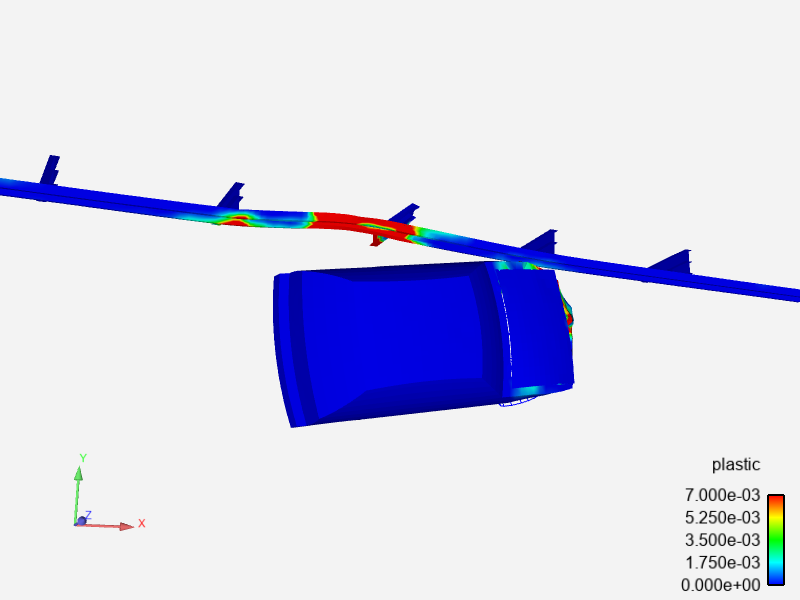



In [ ]:
image = session.show("image", width=800, height=600, aa=4)

### Update renderable
The ``Renderables`` class include several useful methods. The first is the
`update` method,
which regenerates the renderable.

This code adjusts the scene rotation and updates the display of the image
in the scene.



In [ ]:
session.ensight.view_transf.rotate(10.0, 10.0, 0.0)
image.update()

### Display renderable in a browser

All renderables display their results on web pages. The URL to the web page
is stored in the renderable URL property. You call the
`browser` method
to display the result of the renderable on a new browser tab.



In [ ]:
print(image.url)
image.browser()

### Download renderable
The physical files that make up the display of the renderable reside in the
container/system running the EnSight instance. You can download these files
to the local system using the
`download` method.

<div class="alert alert-info"><h4>Note</h4><p>For an image renderable, this is a PNG file. But, depending on the type
   of the renderable, the file format could be some other type, such as
   TIFF, AVZ, or EVSN.</p></div>



In [ ]:
local_directory_pathname = "."
image.download(local_directory_pathname)

## Show a deep pixel image renderable
A deep pixel image is a TIFF file that has the part names and
currently displayed variable values included at each pixel. For full effect,
you must view a deep pixel image renderable on a web page.

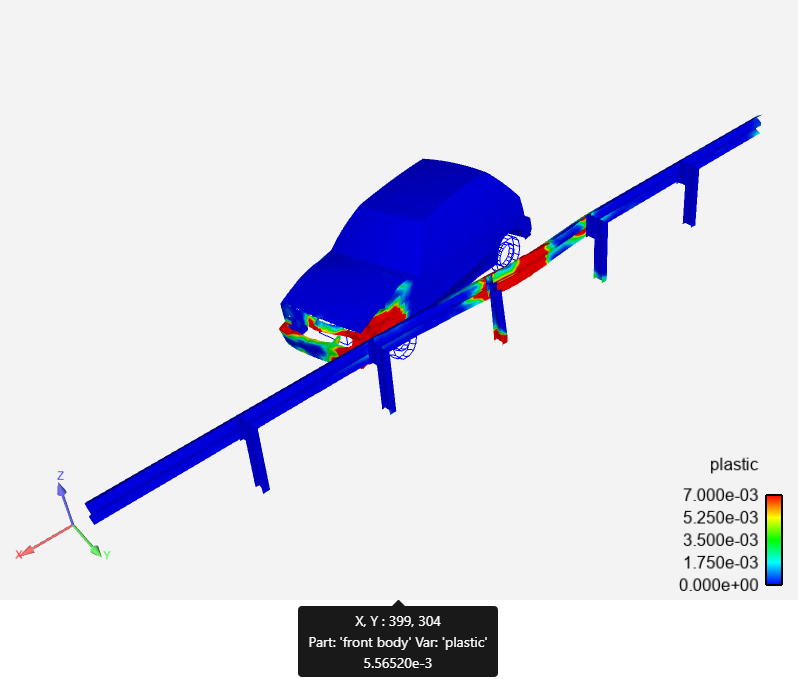

In [ ]:
deep_image = session.show("deep_pixel", width=800, height=600, aa=4)

## Show an animation renderable
An animation renderable is generated by rendering all the timesteps of the
currently loaded dataset into an MPEG4 container. You can set the size of
the animation and the playback rate in frames per second in the call to
the `show` method.
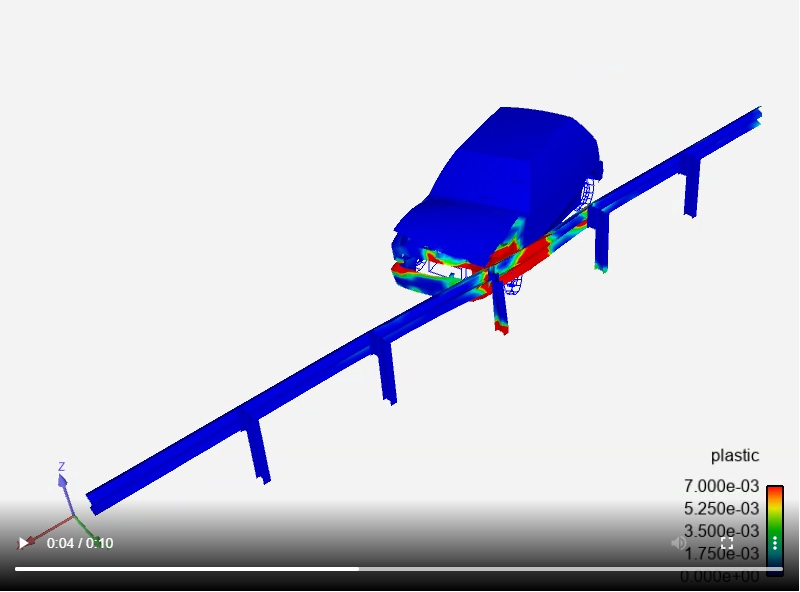

In [ ]:
animation = session.show("animation", width=800, height=600, aa=2, fps=2.0)

## Show a WebGL 3D scene renderable
Create a 3D scene renderable and render it interactively in the web browser.
The scene is generated in AVZ format, which is what the
`download` method
would pull. By default, only the current timestep is captured, but if
you set the ``temporal`` parameter, it can be over all timesteps.
datasets.

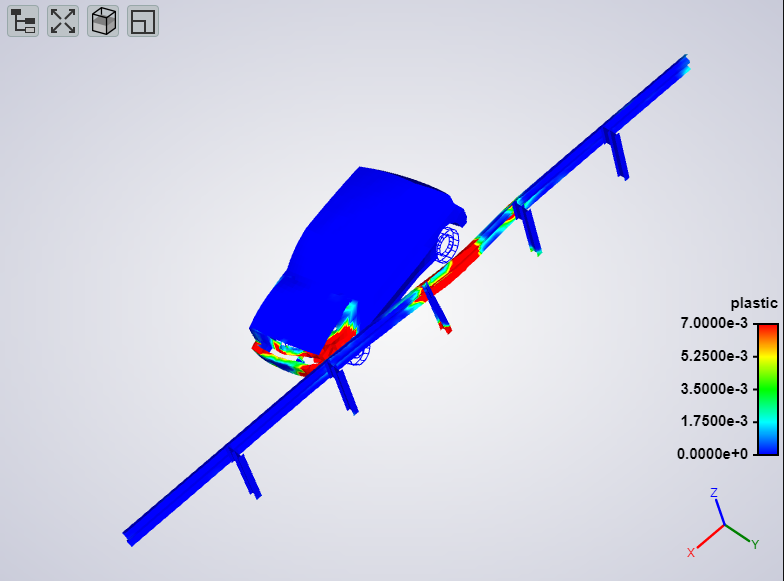

<div class="alert alert-info"><h4>Note</h4><p>Because the geometry is generated in the EnSight session and downloaded
   to the browser for display, be careful when using this method with larger
   datasets.</p></div>




In [ ]:
webgl = session.show("webgl")

## Interact directly with EnSight
Use remote rendering with dynamic pixel transport to interact directly with
the EnSight session. The keyboard and mouse interactions are sent directly
to EnSight in this mode.

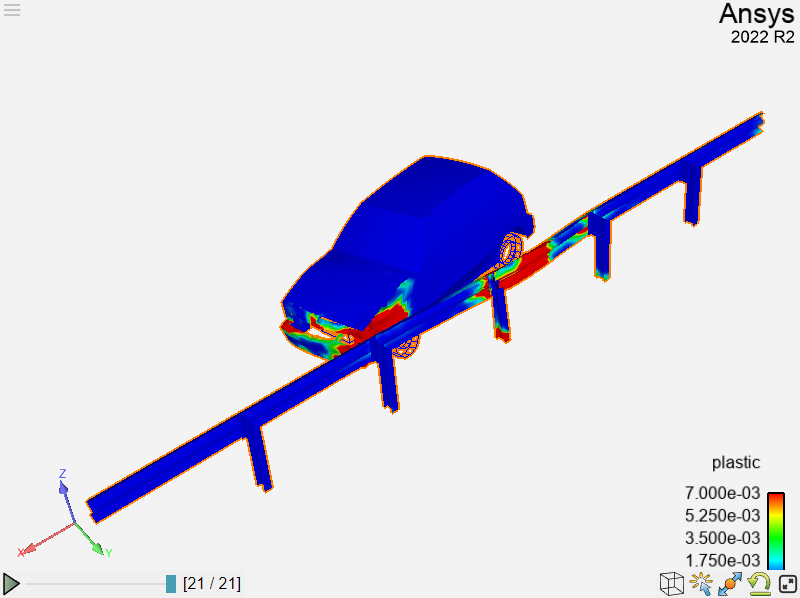

<div class="alert alert-info"><h4>Note</h4><p>This renderable relies on a persistent, low-latency web socket connection
   to the EnSight session. It is most useful when the EnSight session container
   has access to hardware-accelerated rendering and when datasets/geometry get
   larger. Multiple connections can be made to the same renderable (via HTTP).
   Those renderables are "shared" between all the viewers.</p></div>


In [ ]:
remote = session.show("remote")

## Export raw content
The `render` and `geometry` methods are capable
of returning the raw file data directly, without the use of a web browser.

This example exports the raw file data for a PNG file and a GLB file.

In [ ]:
pngdata = session.render(1920, 1080, aa=4)
with open("simple_example.png", "wb") as fp:
    fp.write(pngdata)
glbdata = session.geometry()
with open("simple_example.glb", "wb") as fp:
    fp.write(glbdata)

## Close the session
Close the connection and shut down the EnSight instance.



In [ ]:
session.close()